In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline
import tabula


In [47]:
ncaa = pd.read_excel(r'C:\Users\benre\Python\python projects\Sports\Swimming NCAA\ncaa swimmers.xlsx')
ncaa.head(15)

,Rank,Time,Last Name,First Name,Yr,Team,Meet Date,Sex,Event
0,1,18.27,Seeliger,Bjorn,SO,California,2022-03-24,M,50 FR
1,2,18.53,Crooks,Jordan,FR,Tennessee,2022-02-16,M,50 FR
2,3,18.56,Curry,Brooks,JR,LSU,2022-03-24,M,50 FR
3,4,18.6,Brownstead,Matt,SO,Virginia Tech,2022-03-24,M,50 FR
4,4,18.6,Kibler,Drew,SR,Texas,2022-03-24,M,50 FR
5,6,18.63,Auchinachie,Cameron,5Y,Texas,2022-03-24,M,50 FR
6,7,18.66,Korstanje,Nyls,JR,NC State,2022-03-24,M,50 FR
7,8,18.74,Curtiss,David,FR,NC State,2022-02-16,M,50 FR
8,9,18.75,Chaney,Adam,SO,Florida,2022-03-24,M,50 FR
9,10,18.79,Ramadan,Youssef,SO,VirginiaTech,2022-03-24,M,50 FR


In [ ]:
### Event abbreviations 
# FR = Freestyle
# BK = Backstroke
# BS = Breaststroke
# BF = Butterfly


In [26]:
pd.set_option('display.max_rows',2000)
ncaa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rank        1807 non-null   int64         
 1   Time        1807 non-null   object        
 2   Last Name   1807 non-null   object        
 3   First Name  1807 non-null   object        
 4   Yr          1807 non-null   object        
 5   Team        1807 non-null   object        
 6   Meet Date   1807 non-null   datetime64[ns]
 7   Sex         1807 non-null   object        
 8   Event       1807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 127.2+ KB


In [42]:
ncaa['Time'].dtypes

dtype('O')

In [28]:
ncaa.replace(to_replace='PriNC Stateeton', value='Princeton', inplace=True)
ncaa.replace(to_replace='Ohio StSt', value='Ohio St', inplace=True)
ncaa.replace(to_replace='Ohio St St', value='Ohio St', inplace=True)
ncaa.replace(to_replace='Arizona StSt', value='Arizona St',inplace=True)
ncaa.replace(to_replace='Arizona St St', value='Arizona St',inplace=True)
ncaa.replace(to_replace='Notre Dame Dame', value='Notre Dame',inplace=True)
ncaa.replace(to_replace='Cleveland St St', value='Cleveland St',inplace=True)
ncaa.replace(to_replace='Cleveland St St', value='Cleveland St',inplace=True)
ncaa.replace(to_replace='TexasA&M', value='Texas A&M',inplace=True)
ncaa.replace(to_replace='MissouriSt', value='Missouri St',inplace=True)
ncaa.replace(to_replace='Bowling', value='Bowling Green',inplace=True)
ncaa.replace(to_replace='Boston College College', value='Boston College',inplace=True)
ncaa.replace(to_replace='Cal Baptist', value='Cal Poly Baptist',inplace=True)
ncaa.replace(to_replace='CalBaptist', value='Cal Poly Baptist',inplace=True)
ncaa.replace(to_replace='Air', value='Air Force',inplace=True)
ncaa.replace(to_replace='Southern CaliC Stateali', value='Southern Cali',inplace=True)

In [29]:
lgfr = ncaa[ncaa['Event'] == '1650 FR']
ncaa = ncaa[ncaa.Event != '1650 FR']
lgfr.head()

,Rank,Time,Last Name,First Name,Yr,Team,Meet Date,Sex,Event
201,1,00:14:22.280000,Finke,Bobby,SR,Florida,2022-03-26,M,1650 FR
202,2,00:14:31.340000,Gallant,Will,SO,NC State,2022-03-26,M,1650 FR
203,3,00:14:31.720000,Dant,Ross,JR,NC State,2022-03-26,M,1650 FR
204,4,00:14:32.400000,Johnston,David,SO,Texas,2022-03-05,M,1650 FR
205,5,00:14:33.530000,Magahey,Jake,SO,Georgia,2022-03-26,M,1650 FR


In [30]:
bs = ncaa[(ncaa['Event']=='100 BS') & (ncaa['Sex']=='F') & (ncaa['Rank'] >= 56)]
bs['Time'] = bs['Time'].astype(str)
bs['Mintues'] = bs['Time'].apply(lambda x: x.split(':')[1])
bs['Seconds'] = bs['Time'].apply(lambda x: x.split(':')[2])
bs['Mintues'] = bs['Mintues'].astype(float)
bs['Seconds'] = bs['Seconds'].astype(float)
bs['Time in Sec'] = bs['Mintues']*60 + bs['Seconds']
bs.drop(['Time','Mintues','Seconds'],axis=1,inplace=True)
bs['Time'] = bs['Time in Sec']
bs = bs[['Rank','Time','Last Name','First Name','Yr','Team','Meet Date','Sex','Event']]
bs.head()

,Rank,Time,Last Name,First Name,Yr,Team,Meet Date,Sex,Event
1561,56,60.01,Geyer,Sammy,SR,San Diego St,2022-02-18,F,100 BS
1562,56,60.01,Pintar,Tjasa,5Y,Tennessee,2022-02-18,F,100 BS
1563,58,60.02,Fangli,Henrietta,FR,Houston,2022-02-18,F,100 BS
1564,58,60.02,Jack,Liv,SR,Penn St,2022-02-27,F,100 BS
1565,60,60.03,Cothern,Bella,SO,Arkansas,2021-11-19,F,100 BS


In [31]:
ncaa.reset_index()
ncaa = ncaa.drop(range(1561,1606))
ncaa = ncaa.append(bs)
ncaa.tail(10)


C:\Users\benre\AppData\Local\Temp\ipykernel_8544\2603535404.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ncaa = ncaa.append(bs)


,Rank,Time,Last Name,First Name,Yr,Team,Meet Date,Sex,Event
1596,90,60.9,Maoz,Abby,FR,LSU,2022-02-18,F,100 BS
1597,92,60.91,Limargo,Chloe,SR,San Diego Jose St,2022-02-18,F,100 BS
1598,93,60.92,Rudolph,Lexi,SO,UNC Wilmington,2022-02-18,F,100 BS
1599,93,60.92,Sykes,Emily,5Y,Tennessee,2022-02-25,F,100 BS
1600,95,60.95,Mathieu,Tylor,JR,Florida,2021-11-19,F,100 BS
1601,96,60.96,Denisenko,AlekSan Diegodra,FR,Harvard,2022-02-18,F,100 BS
1602,97,60.98,Zubina,Yuliya,JR,Missouri St,2022-02-18,F,100 BS
1603,97,60.98,Hall,Maia,FR,Nebraska,2022-02-18,F,100 BS
1604,99,60.99,Jones,Bradi,SO,Arkansas,2022-02-18,F,100 BS
1605,100,61.0,Mangaoang,Desirae,SO,Texas A&M,2022-02-18,F,100 BS


In [32]:
ncaa = ncaa.append(bs)
ncaa.tail(10)

C:\Users\benre\AppData\Local\Temp\ipykernel_8544\1408376323.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ncaa = ncaa.append(bs)


,Rank,Time,Last Name,First Name,Yr,Team,Meet Date,Sex,Event
1596,90,60.9,Maoz,Abby,FR,LSU,2022-02-18,F,100 BS
1597,92,60.91,Limargo,Chloe,SR,San Diego Jose St,2022-02-18,F,100 BS
1598,93,60.92,Rudolph,Lexi,SO,UNC Wilmington,2022-02-18,F,100 BS
1599,93,60.92,Sykes,Emily,5Y,Tennessee,2022-02-25,F,100 BS
1600,95,60.95,Mathieu,Tylor,JR,Florida,2021-11-19,F,100 BS
1601,96,60.96,Denisenko,AlekSan Diegodra,FR,Harvard,2022-02-18,F,100 BS
1602,97,60.98,Zubina,Yuliya,JR,Missouri St,2022-02-18,F,100 BS
1603,97,60.98,Hall,Maia,FR,Nebraska,2022-02-18,F,100 BS
1604,99,60.99,Jones,Bradi,SO,Arkansas,2022-02-18,F,100 BS
1605,100,61.0,Mangaoang,Desirae,SO,Texas A&M,2022-02-18,F,100 BS


Analysis & Visualizations

In [33]:
ncaa.groupby(['Event','Sex'])['Time'].mean().reset_index()

,Event,Sex,Time
0,100 BF,F,52.142100
1,100 BF,M,45.803762
2,100 BK,F,52.244800
3,100 BK,M,46.014500
4,100 BS,F,60.000414
5,100 BS,M,52.352475
6,100 FR,F,48.316200
7,100 FR,M,42.398100
8,50 BF,F,24.951485
9,50 BF,M,22.006000


In [34]:
es = ncaa.groupby(['Event','Sex'])['Time'].mean().reset_index()
es = pd.DataFrame(es)
es.reset_index(col_level=1)
es

,Event,Sex,Time
0,100 BF,F,52.142100
1,100 BF,M,45.803762
2,100 BK,F,52.244800
3,100 BK,M,46.014500
4,100 BS,F,60.000414
5,100 BS,M,52.352475
6,100 FR,F,48.316200
7,100 FR,M,42.398100
8,50 BF,F,24.951485
9,50 BF,M,22.006000


In [35]:
es.rename(columns= {'Time': 'Time (s)'})

,Event,Sex,Time (s)
0,100 BF,F,52.142100
1,100 BF,M,45.803762
2,100 BK,F,52.244800
3,100 BK,M,46.014500
4,100 BS,F,60.000414
5,100 BS,M,52.352475
6,100 FR,F,48.316200
7,100 FR,M,42.398100
8,50 BF,F,24.951485
9,50 BF,M,22.006000


NCAA Average Male vs Female times

Text(0.5, 0, 'Event')

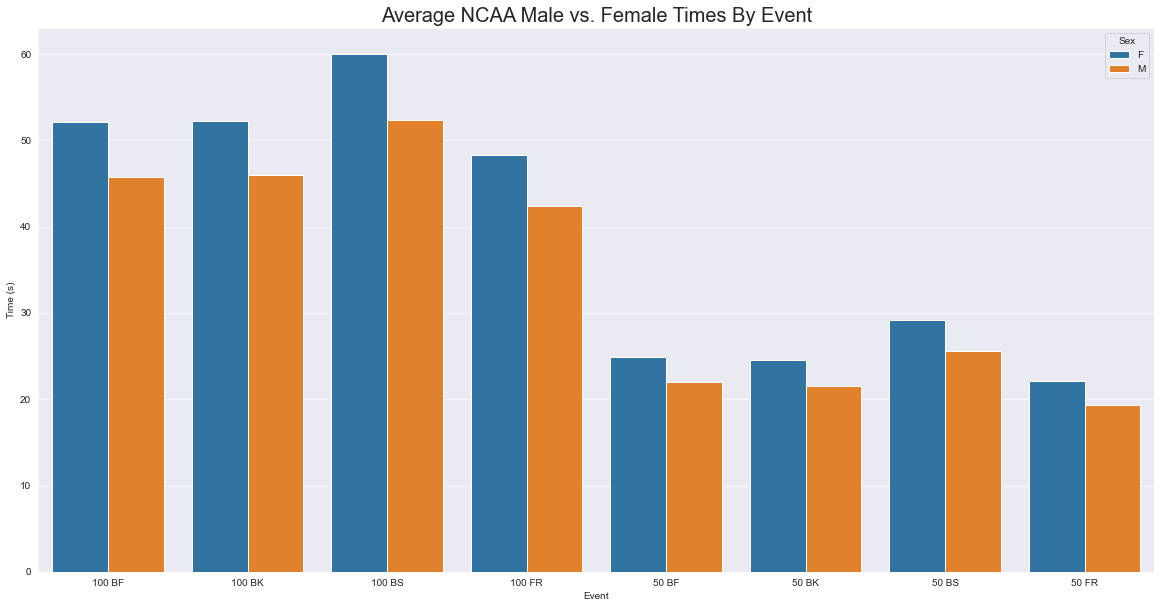

In [36]:
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
vs = sns.barplot(data=es,y='Time', x='Event', hue='Sex')
vs.axes.set_title('Average NCAA Male vs. Female Times By Event',fontsize=20)
vs.set_ylabel('Time (s)',fontsize=10)
vs.set_xlabel('Event',fontsize=10)

Top 100 Male vs. Female Event times

Text(0.5, 0, 'Time (s)')

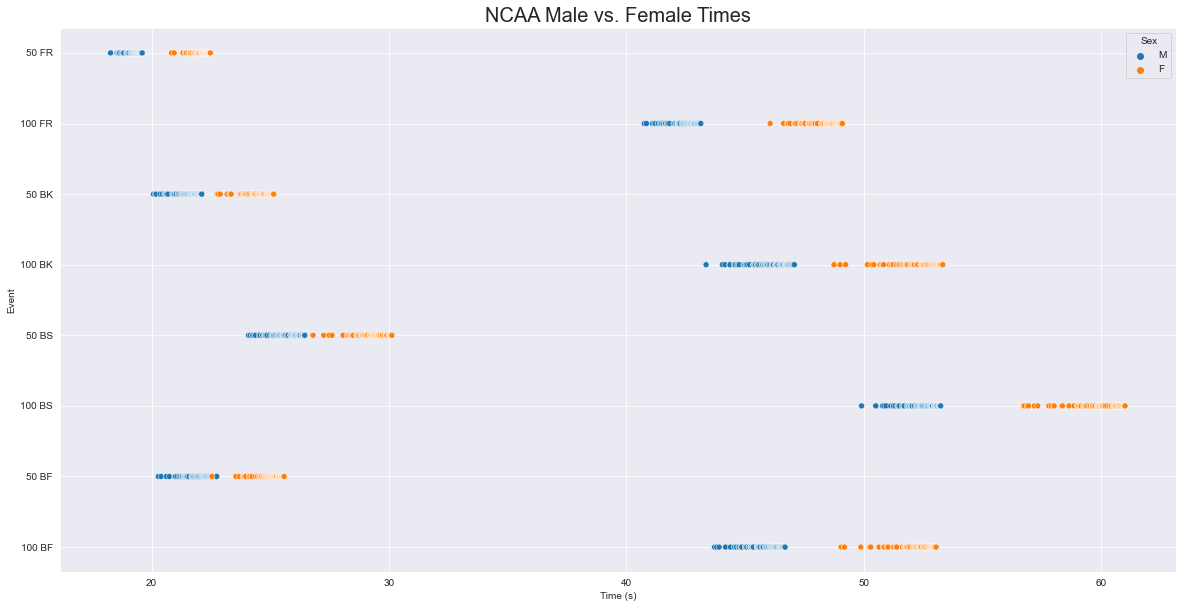

In [37]:
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
times = sns.scatterplot(data=ncaa, y='Event', x='Time', hue='Sex')
times.axes.set_title('NCAA Male vs. Female Times',fontsize=20)
times.set_ylabel('Event',fontsize=10)
times.set_xlabel('Time (s)',fontsize=10)


In [38]:
tf = ncaa[(ncaa['Rank'] >= 1) & (ncaa['Rank'] <= 3)]
tf.head()

,Rank,Time,Last Name,First Name,Yr,Team,Meet Date,Sex,Event
0,1,18.27,Seeliger,Bjorn,SO,California,2022-03-24,M,50 FR
1,2,18.53,Crooks,Jordan,FR,Tennessee,2022-02-16,M,50 FR
2,3,18.56,Curry,Brooks,JR,LSU,2022-03-24,M,50 FR
101,1,40.75,Seeliger,Bjorn,SO,California,2022-03-26,M,100 FR
102,2,40.84,Curry,Brooks,JR,LSU,2022-03-26,M,100 FR


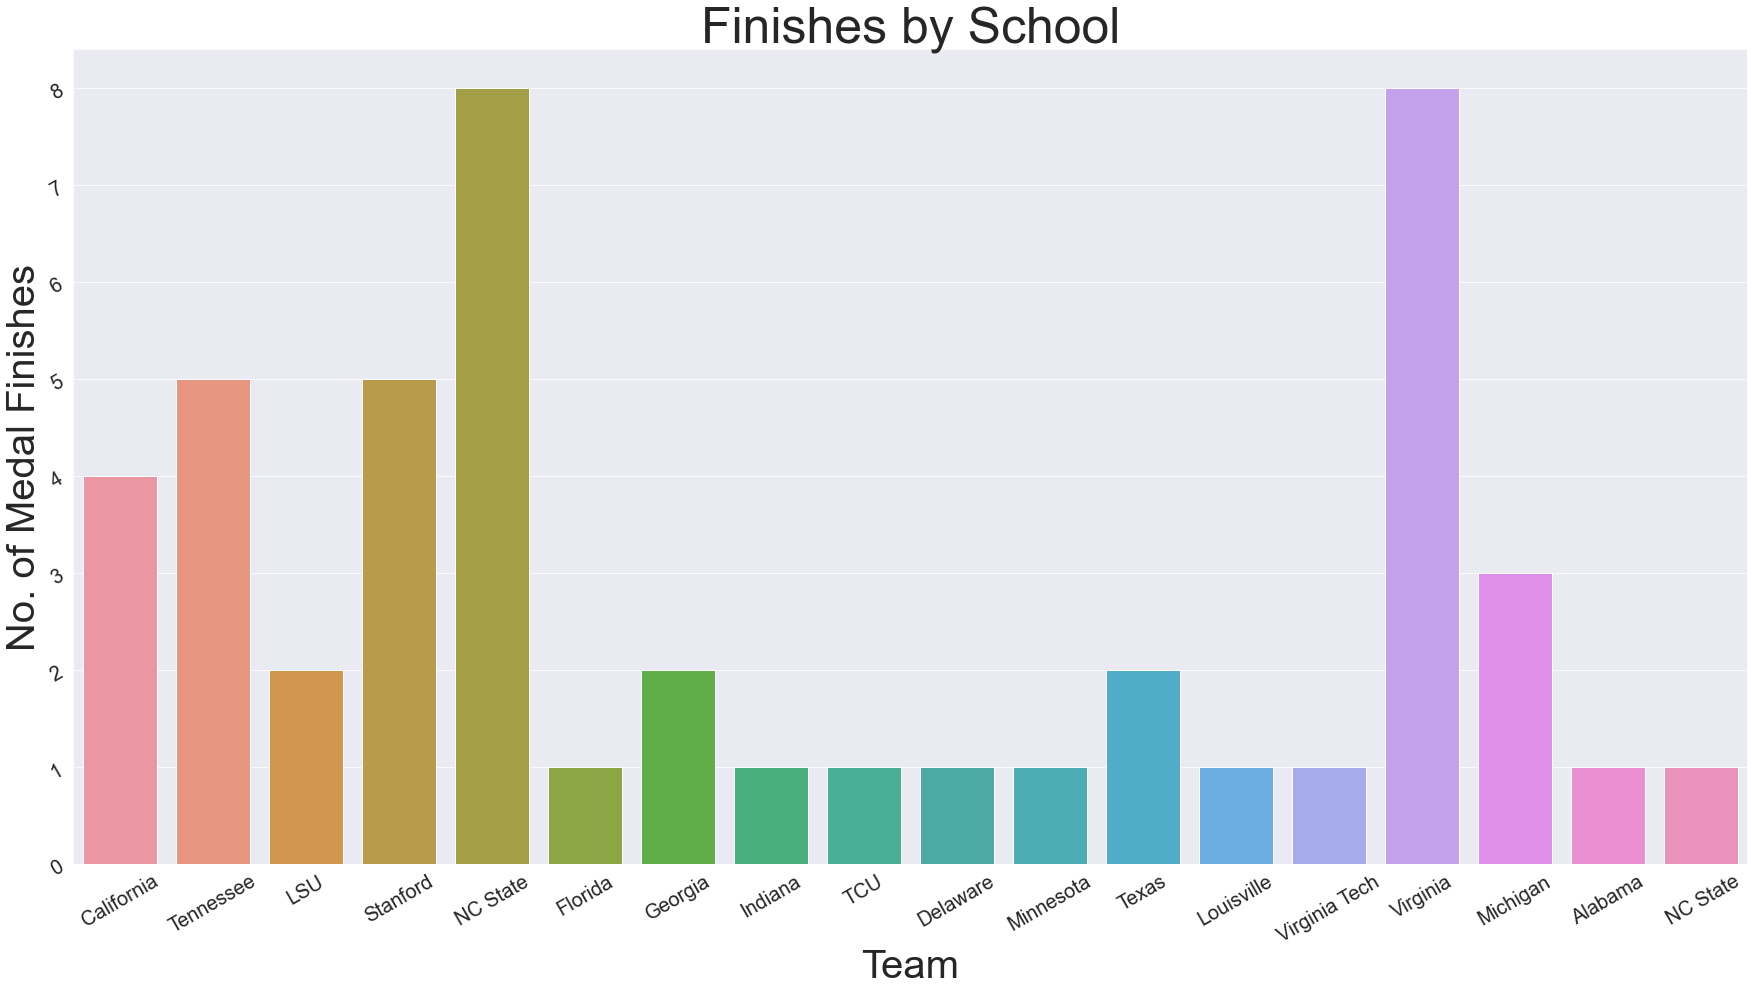

In [39]:
plt.figure(figsize = (30,15))
sns.set_style('darkgrid')
fig = sns.countplot(data=tf, x='Team')
fig.axes.set_title('Finishes by School',fontsize=50)
fig.set_ylabel('No. of Medal Finishes',fontsize=40)
fig.set_xlabel('Team',fontsize=40)
fig.tick_params(labelsize=20, rotation=30, )


Stanford Comparison

In [40]:
sf = ncaa[ncaa['Team'] == 'Stanford']
sf.head(10)

,Rank,Time,Last Name,First Name,Yr,Team,Meet Date,Sex,Event
18,19,19.06,Minakov,Andrei,SO,Stanford,2021-12-17,M,50 FR
52,53,19.4,Maurer,Luke,SO,Stanford,2022-03-03,M,50 FR
103,3,41.09,Minakov,Andrei,SO,Stanford,2022-03-26,M,100 FR
161,60,42.69,Maurer,Luke,SO,Stanford,2022-03-05,M,100 FR
189,88,42.99,Roy,Neel,JR,Stanford,2022-03-02,M,100 FR
313,13,20.93,MacAlister,Leon,JR,Stanford,2022-03-23,M,50 BK
412,12,44.75,MacAlister,Leon,JR,Stanford,2022-03-04,M,100 BK
430,30,45.72,Sequeira,Aaron,FR,Stanford,2022-03-04,M,100 BK
461,61,46.45,Polonsky,Ron,FR,Stanford,2022-02-19,M,100 BK
525,25,25.22,Dang,Ethan,SO,Stanford,2021-11-05,M,50 BS


Text(0.5, 1.0, 'Stanford Male vs Female')

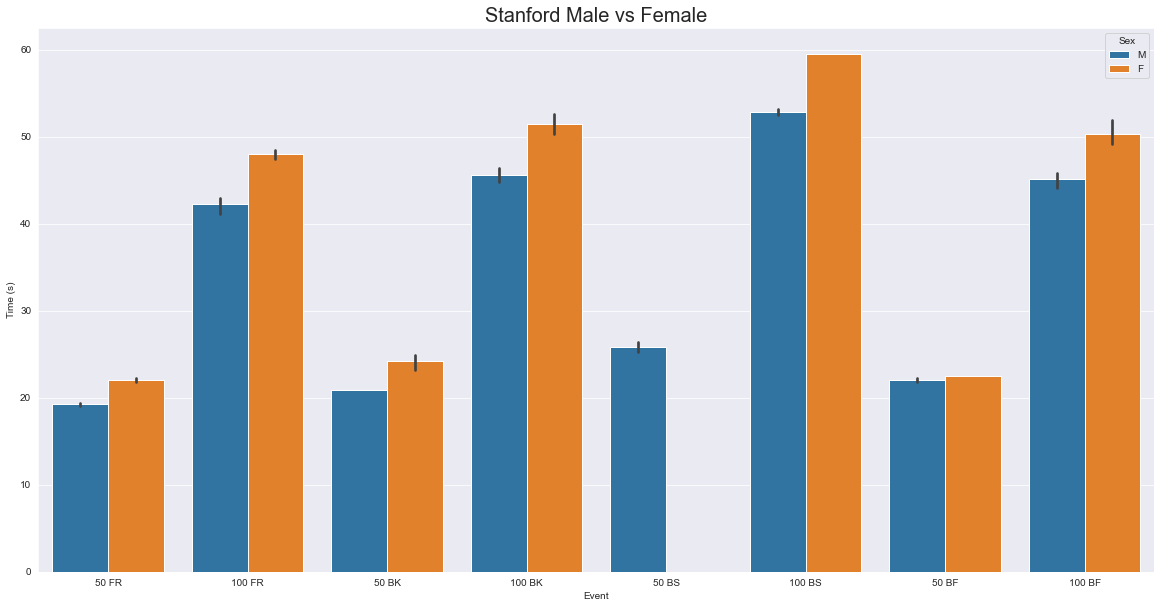

In [41]:
plt.figure(figsize = (20,10))
sns.set_style('darkgrid')
bar = sns.barplot(data=sf,y='Time', x='Event', hue='Sex')
bar.set_ylabel('Time (s)',fontsize=10)
bar.set_title('Stanford Male vs Female', fontsize=20)